In [1]:
import keras
from keras import layers
from keras.models import Sequential
from DatasetReader import load_hoda
from matplotlib import pyplot as plt
import numpy as np

Using TensorFlow backend.


In [2]:
x_train, y_train, x_test, y_test = load_hoda(training_sample_size=3500, test_sample_size=400, size=28)

In [3]:
x_train = np.array(x_train)
x_test = np.array(x_test)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [4]:
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes = 10)

In [5]:
x_validation = x_test[:200]
x_test = x_test[200:]
y_validation = y_test[:200]
y_test = y_test[200:]

In [6]:
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)               

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
history = model.fit(x_train, y_train, epochs=200, batch_size=256, validation_data=(x_validation, y_validation))

Train on 3500 samples, validate on 200 samples
Epoch 1/200
3500/3500 [==============================] - 2s 524us/step - loss: 2.0013 - accuracy: 0.3403 - val_loss: 1.2109 - val_accuracy: 0.8000
Epoch 2/200
3500/3500 [==============================] - 0s 65us/step - loss: 1.0913 - accuracy: 0.6454 - val_loss: 0.5381 - val_accuracy: 0.8100
Epoch 3/200
3500/3500 [==============================] - 0s 62us/step - loss: 0.7392 - accuracy: 0.7537 - val_loss: 0.3455 - val_accuracy: 0.8700
Epoch 4/200
3500/3500 [==============================] - 0s 60us/step - loss: 0.5574 - accuracy: 0.8100 - val_loss: 0.2686 - val_accuracy: 0.9050
Epoch 5/200
3500/3500 [==============================] - 0s 64us/step - loss: 0.4510 - accuracy: 0.8480 - val_loss: 0.1989 - val_accuracy: 0.9300
Epoch 6/200
3500/3500 [==============================] - 0s 64us/step - loss: 0.3893 - accuracy: 0.8729 - val_loss: 0.1688 - val_accuracy: 0.9500
Epoch 7/200
3500/3500 [==============================] - 0s 66us/step - loss

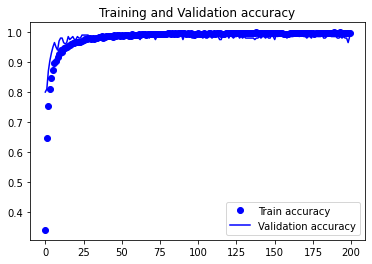

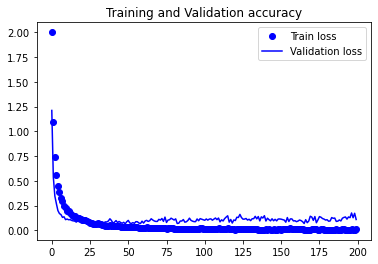

In [10]:
train_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs = range(len(train_accuracy))

plt.plot(epochs, train_accuracy, 'bo', label='Train accuracy')
plt.plot(epochs, validation_accuracy, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, train_loss, 'bo', label='Train loss')
plt.plot(epochs, validation_loss, 'b', label='Validation loss')
plt.title('Training and Validation accuracy')
plt.legend()

plt.show()

In [11]:
model.save('./model/model.h5')